# Classify Images of Cats and Dogs 

Understanding Data :

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random

In [4]:
import os
# Check the root extraction path
root_dir = '/kaggle/working'
train_dir = os.path.join(root_dir, 'D:/Private/Prodigy InfoTech/Task 3/train')
test_dir= os.path.join(root_dir, 'D:/Private/Prodigy InfoTech/Task 3/test')

# Count and preview files
all_files = os.listdir(train_dir)
print(f"Total files in 'train/': {len(all_files)}")

# Separate by class for info
cat_files = [f for f in all_files if f.startswith('cat')]
dog_files = [f for f in all_files if f.startswith('dog')]

print(f"Number of cat images: {len(cat_files)}")
print(f"Number of dog images: {len(dog_files)}")
print("\nSample filenames:")
print("Cats:", cat_files[:5])
print("Dogs:", dog_files[:5])

Total files in 'train/': 25000
Number of cat images: 12500
Number of dog images: 12500

Sample filenames:
Cats: ['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
Dogs: ['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg']


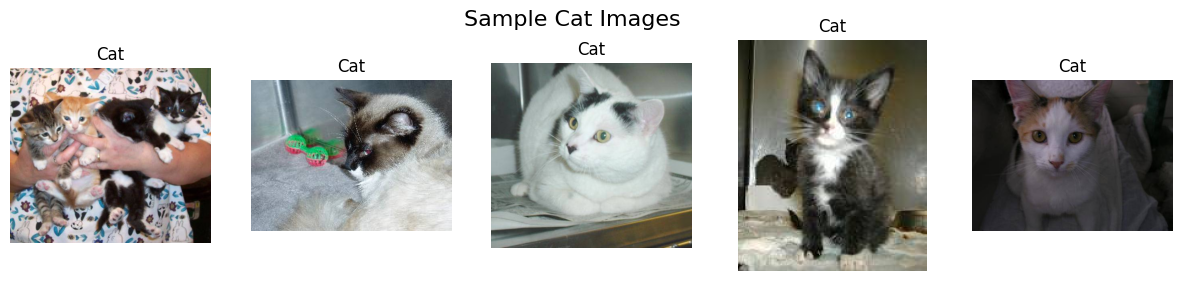

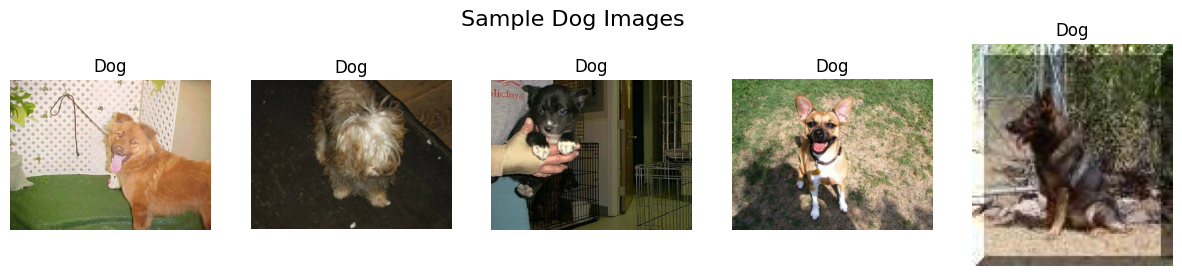

In [5]:
# Get file lists
cat_files = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.startswith('cat')]
dog_files = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if f.startswith('dog')]

# Randomly select 5 images from each class
sample_cats = random.sample(cat_files, 5)
sample_dogs = random.sample(dog_files, 5)

# Plot cats
plt.figure(figsize=(15, 3))
for i, file in enumerate(sample_cats):
    img = Image.open(os.path.join(train_dir, file))
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title("Cat")
    plt.axis('off')
plt.suptitle("Sample Cat Images", fontsize=16)
plt.show()

# Plot dogs
plt.figure(figsize=(15, 3))
for i, file in enumerate(sample_dogs):
    img = Image.open(os.path.join(train_dir, file))
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title("Dog")
    plt.axis('off')
plt.suptitle("Sample Dog Images", fontsize=16)
plt.show()

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model=VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [7]:
def features_extractor(img_path):
    img=load_img(img_path,target_size=(224,224))
    img_array=img_to_array(img)
    img_array=np.expand_dims(img_array,axis=0)
    img_array=preprocess_input(img_array)
    features=model.predict(img_array,verbose=0)
    features=features.flatten()
    return features/np.linalg.norm(features)

In [ ]:
features=[]
lables=[]
for img in cat_files:
    features.append(features_extractor(img))
    lables.append('cat') #cat
for img in dog_files:
    features.append(features_extractor(img))
    lables.append('dog') #dog

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(features, lables, test_size=0.2, random_state=42)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [10]:
y_pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("accuracy: ",accuracy)

Precision: 0.9866006042553245
Recall: 0.9866
F1 Score: 0.9865999469336885
accuracy:  0.9866


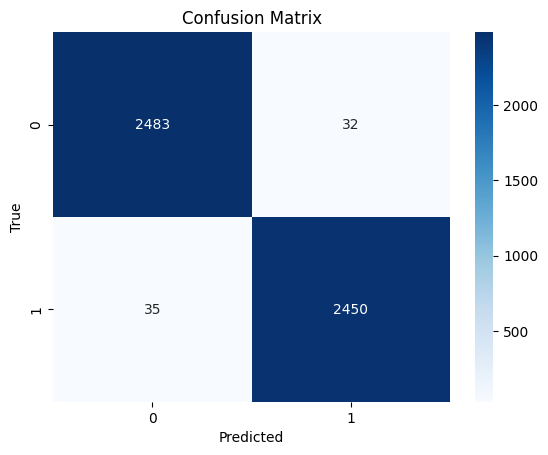

In [12]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()